In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
#Otros importes
import pandas as pd

## Leemos el dataset

In [3]:
titanic_all = pd.read_csv('tested.csv')
titanic_all.shape

(418, 12)

In [4]:
titanic_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
titanic_all.isnull().sum() # suma los nulos 
#vemos que la mayoría de datos de cabina son nulos, por lo que esa columna no nos sirve 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

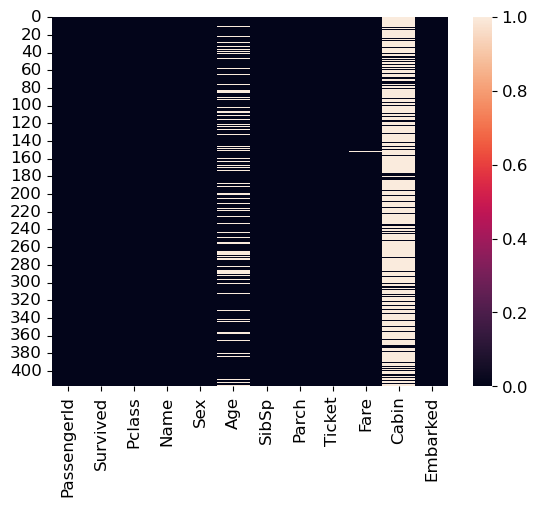

In [6]:
import seaborn as sns

sns.heatmap(titanic_all.isnull())
# con la grafica observamos mejor los nulos, vemos que la columna 'age' también contiene varios nulos

In [7]:
titanic_all['Embarked'].value_counts() # lugar de donde embarcan

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [8]:
titanic_all['Sex'].value_counts() # Cantidad de mujeres y hombres

male      266
female    152
Name: Sex, dtype: int64

In [9]:
titanic_all['Pclass'].value_counts() # Datos de las clases dentro del barco

3    218
1    107
2     93
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

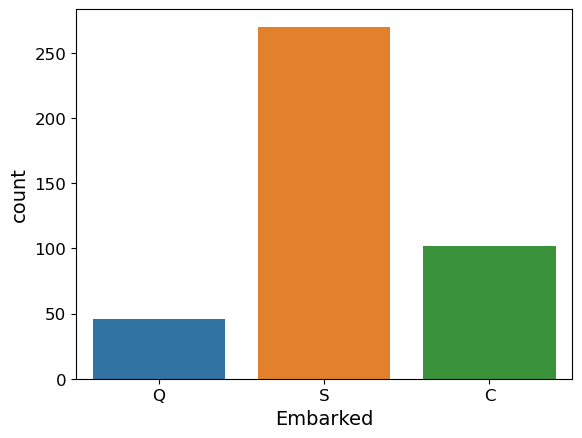

In [10]:
sns.countplot(data=titanic_all, x="Embarked")

<AxesSubplot:xlabel='Sex', ylabel='count'>

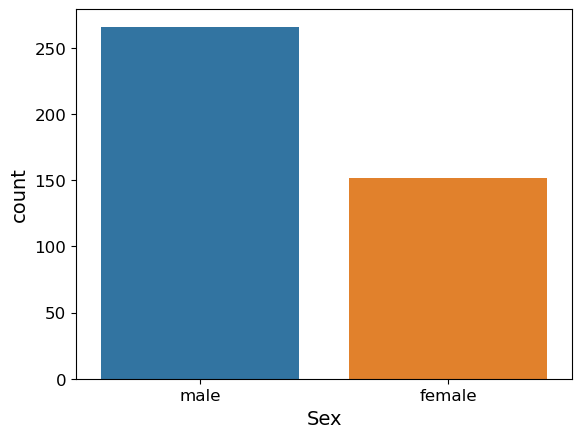

In [11]:
sns.countplot(data=titanic_all, x="Sex")

<AxesSubplot:xlabel='Pclass', ylabel='count'>

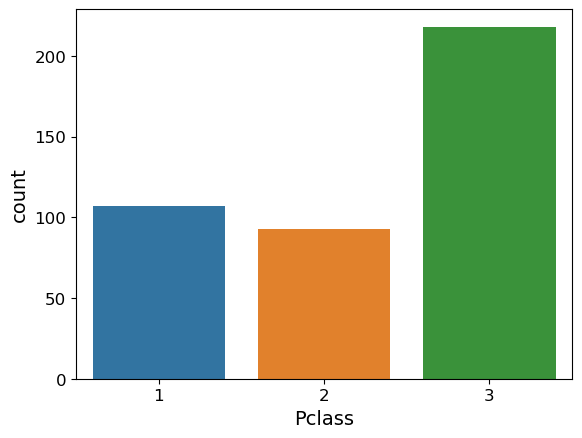

In [12]:
sns.countplot(data=titanic_all, x="Pclass")

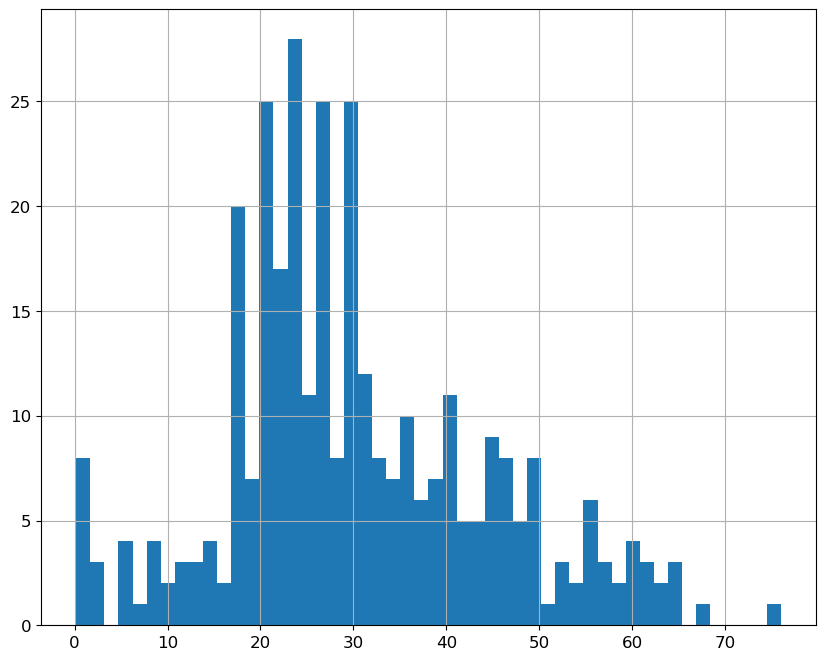

In [13]:
titanic_all['Age'].hist(bins=50, figsize=(10,8))
plt.show()

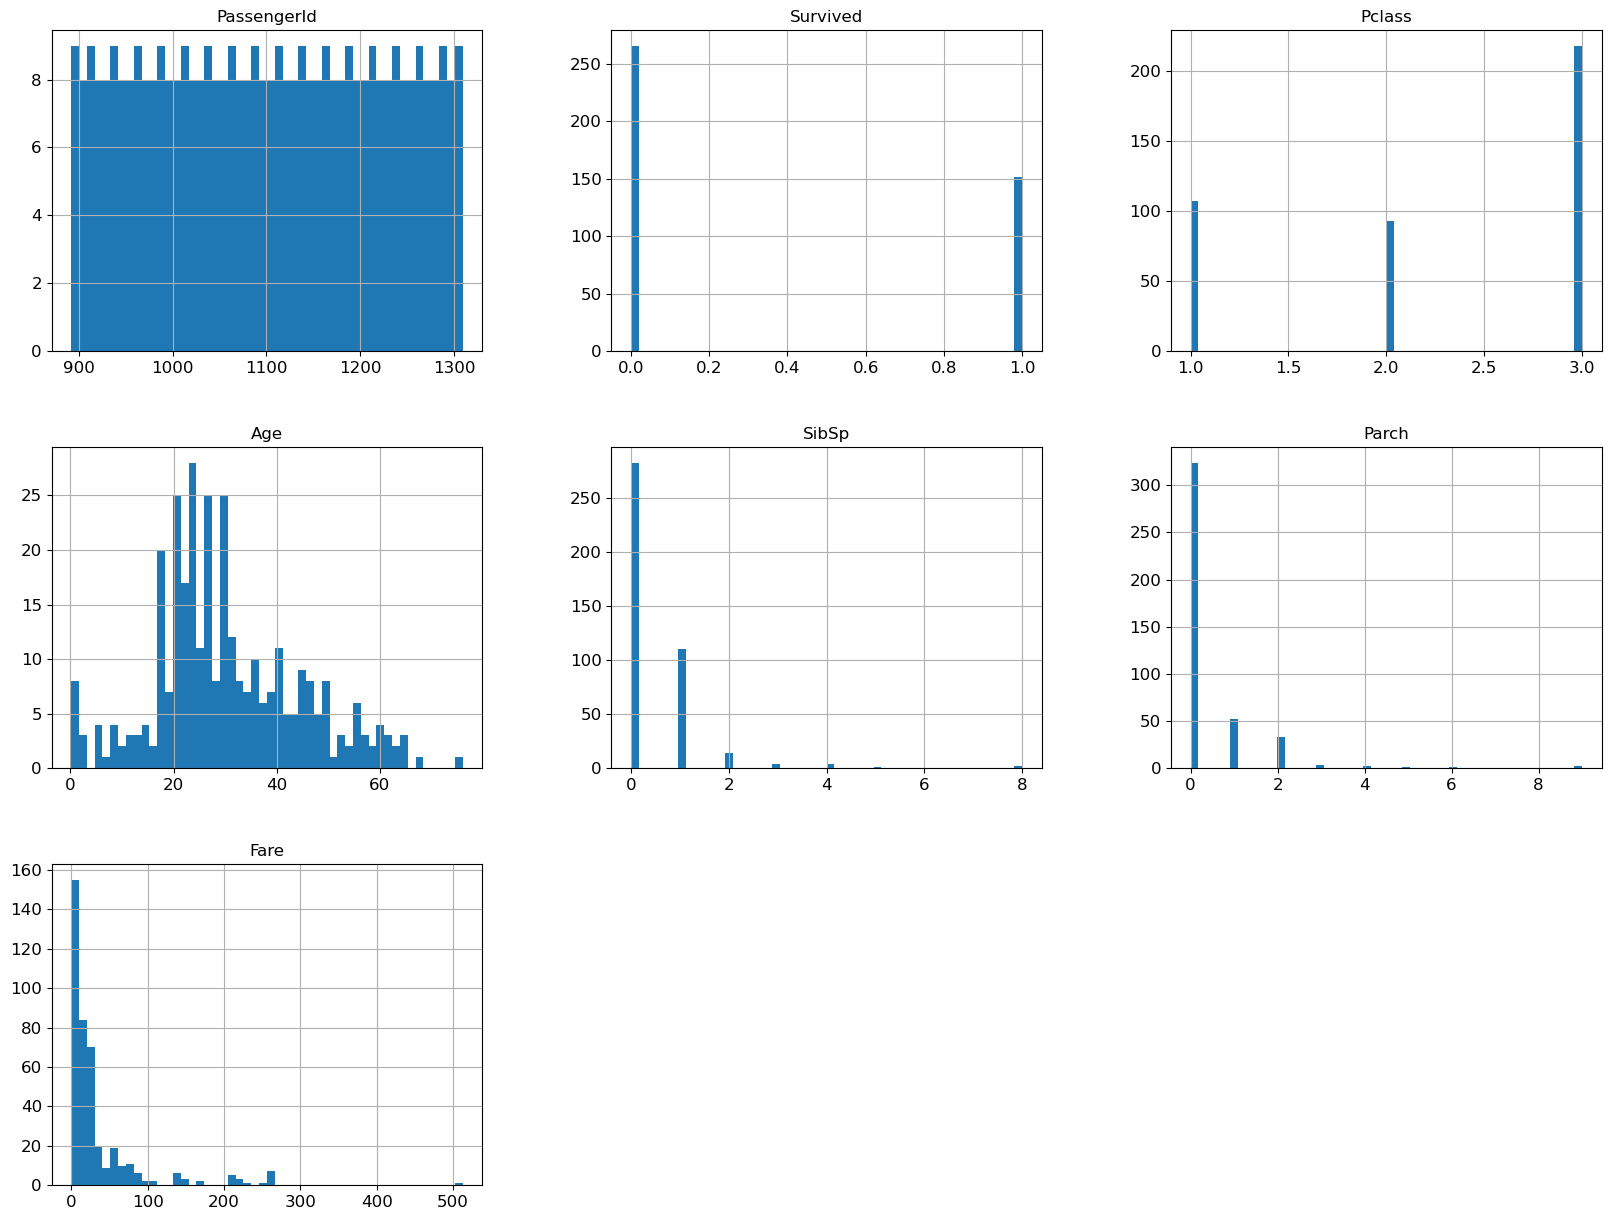

In [14]:
titanic_all.hist(bins=50, figsize=(20,15))
plt.show()

In [15]:
corr_matrix = titanic_all.corr()
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,-0.034102,0.003818,0.043080,0.008211
Survived,-0.023245,1.000000,-0.108615,-0.000013,0.099943,0.159120,0.191514
Pclass,-0.026751,-0.108615,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.000013,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.099943,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.159120,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,0.191514,-0.577147,0.337932,0.171539,0.230046,1.000000


In [16]:
corr_matrix['Survived'].sort_values(ascending=False)#ordeno la matriz correlación y escojo la columna que me interesa de forma no ascendentes

Survived       1.000000
Fare           0.191514
Parch          0.159120
SibSp          0.099943
Age           -0.000013
PassengerId   -0.023245
Pclass        -0.108615
Name: Survived, dtype: float64

# Procesamiento de los datos

In [17]:
titanic_c = titanic_all.copy()

titanic= titanic_c.drop(['Name','Ticket','Cabin','PassengerId'],axis=1) # valores que no nos aportan información
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,NaN,0,0,8.0500,S


In [18]:
titanic.info()
# Observamos que las columnas 'Sex' y 'Embarked' no son números, por lo que tendremos que codificarlas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [19]:
# Dropeamos las columnas que no son numeros para rellenar los nulos de los que si son 
sex = titanic.drop("Sex", axis = 1) 
embarked_sex = sex.drop("Embarked", axis= 1)
embarked_sex

# También dropeamos la columna de Pclass para separar su contenido
embarked_sex_Pclass_drop = embarked_sex.drop ("Pclass", axis=1)
embarked_sex_Pclass_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Age       332 non-null    float64
 2   SibSp     418 non-null    int64  
 3   Parch     418 non-null    int64  
 4   Fare      417 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 16.5 KB


In [20]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy="median") # Las celdas que están vacías las va rellenar con la media


In [21]:
imputer.fit (embarked_sex_Pclass_drop)#Completa con la media las que están vacias


SimpleImputer(strategy='median')

In [22]:
x = imputer.transform(embarked_sex_Pclass_drop)#Transforma las columnas vacías

In [23]:
# Creamos un datafraim a partir de una matriz con los indices y columnas que le has dado
titanic_transform = pd.DataFrame(x, 
                          columns=embarked_sex_Pclass_drop.columns,
                          index=embarked_sex_Pclass_drop.index
                         )
titanic_transform.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    float64
 1   Age       418 non-null    float64
 2   SibSp     418 non-null    float64
 3   Parch     418 non-null    float64
 4   Fare      418 non-null    float64
dtypes: float64(5)
memory usage: 16.5 KB


In [24]:
# Seleccionamos las columnas que vamos a codificar
titanic_sex = titanic_all[ ['Sex'] ]
titanic_sex


,Sex
0,male
1,female
2,male
3,male
4,female
...,...
413,male
414,female
415,male
416,male


In [25]:
titanic_embarked = titanic_all[ ['Embarked'] ]
titanic_embarked 

,Embarked
0,Q
1,S
2,Q
3,S
4,S
...,...
413,S
414,C
415,S
416,S


In [26]:
titanic_Pclass= titanic_all[ ['Pclass'] ]
titanic_Pclass 

,Pclass
0,3
1,3
2,2
3,3
4,3
...,...
413,3
414,1
415,3
416,3


In [27]:
# Importamos la clase y los parámetros necesarios
from sklearn.preprocessing import OneHotEncoder;
cat_encoder = OneHotEncoder(sparse=False);

#### Codificamos y unimos al dataframe la columna sex

In [28]:
# convertimos a binario esa columna
titanic_transform.reset_index(drop=True, inplace=True)
# La función reset_index() se utiliza para restablecer el índice del DataFrame. Por defecto, cuando se realiza una operación en un DataFrame, el índice del DataFrame puede cambiar, lo que significa que los índices de las filas pueden dejar de ser consecutivos. La función reset_index() se utiliza para restaurar el índice de las filas para que sean consecutivos.

titanic_sex_1hot = cat_encoder.fit_transform(titanic_sex) # Codificamos la columna de sex

titanic_complete = titanic_transform.join(pd.DataFrame(titanic_sex_1hot,columns=[cat for cat in cat_encoder.categories_[0]])); # Unimos el dataframe de titanic sin NULOS con el de codificación binaria de la columna de sex
titanic_complete.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    float64
 1   Age       418 non-null    float64
 2   SibSp     418 non-null    float64
 3   Parch     418 non-null    float64
 4   Fare      418 non-null    float64
 5   female    418 non-null    float64
 6   male      418 non-null    float64
dtypes: float64(7)
memory usage: 23.0 KB


#### Codificamos y unimos al dataframe la columna embarked

In [29]:
titanic_embarked_1hot = cat_encoder.fit_transform(titanic_embarked) # codificamos la columna
titanic_embarked_sex = titanic_complete.join(pd.DataFrame(titanic_embarked_1hot,columns=[cat for cat in cat_encoder.categories_[0]])); # unimos los dataFrame
titanic_embarked_sex.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    float64
 1   Age       418 non-null    float64
 2   SibSp     418 non-null    float64
 3   Parch     418 non-null    float64
 4   Fare      418 non-null    float64
 5   female    418 non-null    float64
 6   male      418 non-null    float64
 7   C         418 non-null    float64
 8   Q         418 non-null    float64
 9   S         418 non-null    float64
dtypes: float64(10)
memory usage: 32.8 KB


#### Separamos los datos de la columna Pclass  y la unimos al dataframe 

In [30]:
# La columna 'Pclass' la dividimos y le cambiamos de nombre
titanic_Pclass_1hot = cat_encoder.fit_transform(titanic_Pclass) # Searamos la columna 
titanic_embarked_sex_Pclass = titanic_embarked_sex.join(pd.DataFrame(titanic_embarked_1hot,columns=[cat for cat in cat_encoder.categories_[0]])); # unimos los dataFrame


#renombramos las columnas "1", "2" y "3" 
titanic_embarked_sex_Pclass.rename(columns={1:"1 Class", 2:"2 Class", 3:"3 Class"}, inplace=True);
titanic_embarked_sex_Pclass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    float64
 1   Age       418 non-null    float64
 2   SibSp     418 non-null    float64
 3   Parch     418 non-null    float64
 4   Fare      418 non-null    float64
 5   female    418 non-null    float64
 6   male      418 non-null    float64
 7   C         418 non-null    float64
 8   Q         418 non-null    float64
 9   S         418 non-null    float64
 10  1 Class   418 non-null    float64
 11  2 Class   418 non-null    float64
 12  3 Class   418 non-null    float64
dtypes: float64(13)
memory usage: 42.6 KB


## Matriz de correlación con los datos filtrados

In [31]:
corr_matrix2 = titanic_embarked_sex_Pclass.corr()
corr_matrix2

,Survived,Age,SibSp,Parch,Fare,female,male,C,Q,S,1 Class,2 Class,3 Class
Survived,1.000000,0.008035,0.099943,0.159120,0.192036,1.000000,-1.000000,0.033684,0.115574,-0.105883,0.033684,0.115574,-0.105883
Age,0.008035,1.000000,-0.071197,-0.043731,0.342357,0.008035,-0.008035,0.162147,-0.041310,-0.118594,0.162147,-0.041310,-0.118594
SibSp,0.099943,-0.071197,1.000000,0.306895,0.171912,0.099943,-0.099943,-0.016365,-0.098824,0.079367,-0.016365,-0.098824,0.079367
Parch,0.159120,-0.043731,0.306895,1.000000,0.230325,0.159120,-0.159120,-0.005791,-0.132948,0.092201,-0.005791,-0.132948,0.092201
Fare,0.192036,0.342357,0.171912,0.230325,1.000000,0.192036,-0.192036,0.312503,-0.155193,-0.179106,0.312503,-0.155193,-0.179106
female,1.000000,0.008035,0.099943,0.159120,0.192036,1.000000,-1.000000,0.033684,0.115574,-0.105883,0.033684,0.115574,-0.105883
male,-1.000000,-0.008035,-0.099943,-0.159120,-0.192036,-1.000000,1.000000,-0.033684,-0.115574,0.105883,-0.033684,-0.115574,0.105883
C,0.033684,0.162147,-0.016365,-0.005791,0.312503,0.033684,-0.033684,1.000000,-0.199786,-0.767375,1.000000,-0.199786,-0.767375
Q,0.115574,-0.041310,-0.098824,-0.132948,-0.155193,0.115574,-0.115574,-0.199786,1.000000,-0.474962,-0.199786,1.000000,-0.474962
S,-0.105883,-0.118594,0.079367,0.092201,-0.179106,-0.105883,0.105883,-0.767375,-0.474962,1.000000,-0.767375,-0.474962,1.000000


In [32]:
corr_matrix2['Survived'].sort_values(ascending=False) # Vemos la matriz de correlación con los datos filtrados 

Survived    1.000000
female      1.000000
Fare        0.192036
Parch       0.159120
Q           0.115574
2 Class     0.115574
SibSp       0.099943
C           0.033684
1 Class     0.033684
Age         0.008035
S          -0.105883
3 Class    -0.105883
male       -1.000000
Name: Survived, dtype: float64

# Entrenamos el Modelo

### Se paramos los datos para train y los datos para test

In [33]:
from sklearn.model_selection import train_test_split
# importamos las función que nos divide el test automáticamente

X_train, X_test = train_test_split (titanic_embarked_sex_Pclass, test_size=0.20) # le damos un 20% al test
len(X_train), len(X_test)


(334, 84)

In [34]:
y_train = X_train["Survived"].copy() # La 'y' es lo que queremos predecir, por eso lo quitamos de nuestro train

X_train = X_train.drop("Survived", axis=1) # quitamos ese valor de nuestro train


In [35]:
X_train # Nuestros datos de entrenamiento sin la columna que queremos predecir 

,Age,SibSp,Parch,Fare,female,male,C,Q,S,1 Class,2 Class,3 Class
336,32.0,0.0,0.0,13.0000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
31,24.0,2.0,0.0,31.5000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
84,27.0,0.0,0.0,10.7083,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
287,24.0,1.0,0.0,82.2667,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
317,19.0,0.0,0.0,10.5000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
71,21.0,0.0,0.0,7.8958,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
106,21.0,0.0,0.0,7.8208,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
270,46.0,0.0,0.0,75.2417,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
348,24.0,0.0,0.0,13.5000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


## Entrenamos los algoritmos

### Clasificador de Descenso de Gradiente Estocástico

In [36]:
from sklearn.linear_model import SGDClassifier;

sgd_clasificador = SGDClassifier(max_iter=1000, random_state=42)  # Clasificador; el hiperparámetro max_iter hace que ocurran 1000 iteraciones
sgd_clasificador.fit (X_train, y_train)

SGDClassifier(random_state=42)

In [37]:
from sklearn.model_selection import cross_val_score;

sgd_scores = cross_val_score(sgd_clasificador, X_train, y_train, cv=5, scoring="accuracy" ) # Evaluamos el rendimiento de nuestro clasificador (sgd_clasificador) en un conjunto de datos de entrenamiento (X_train, y_train), esto lo aplicamos a 5 subconjuntos diferentes (cv=5), utilizando la métrica de exactitud (scoring="accuracy") para evaluar nuestro modelo
# print(sgd_scores.mean()*100) # Calcula la media de los valores que dan los subconjuntos 
# print(sgd_scores.std()*100) # desviación media
print(f"Mean: {(sgd_scores.mean()*100)} || Standard devition: {(sgd_scores.std()*100)}") # Calculo la media de los valores que dan los subconjuntos y la desviación estandar del algoritmo

Mean: 93.03482587064677 || Standard devition: 13.196746004087847


### Clasificador de bosques aleatorios 

In [38]:
from sklearn.ensemble import RandomForestClassifier;
# crea varios arboles de descion y escoge lo mas frecuente o lo que mas se repite
forest_clf = RandomForestClassifier (n_estimators=100, random_state=42) # n_estimators es la cantidad de arboles que vamos a crear
forest_clf.fit(X_train, y_train) # Entrenamos el modelo

RandomForestClassifier(random_state=42)

In [39]:
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=5, scoring="accuracy")  # Evaluamos el rendimiento del clasificador
# (forest_scores.mean()*100) # La media de los valores
print(f"Mean: {(forest_scores.mean()*100)} || Standard devition: {(forest_scores.std()*100)}")

Mean: 100.0 || Standard devition: 0.0


### SVC (Support Vector Classifier)

In [40]:
from sklearn.svm import SVC;
svc_clf = SVC(gamma="auto", random_state=42) # gamma="auto": Este parámetro controla la amplitud del kernel (un tipo de función matemática que mide la similitud entre pares de puntos de datos).
svc_clf.fit(X_train, y_train)

SVC(gamma='auto', random_state=42)

In [41]:
svc_scores = cross_val_score(svc_clf, X_train, y_train, cv=5, scoring="accuracy")  # Evaluamos el rendimiento del clasificador
# (svc_scores.mean()*100)
print(f"Mean: {(svc_scores.mean()*100)} || Standard devition: {(svc_scores.std()*100)}")

Mean: 73.04387155133425 || Standard devition: 2.2423437822235255


### Rendimiento de los clasificadores

In [42]:
print("Tipo de algoritmo    media     desviación estandar")
print("=========================================================")
print(f"SGDClassifier: {sgd_scores.mean(), sgd_scores.std()}")
print(f"RandomForestClassifier: {forest_scores.mean(), forest_scores.std()}")
print(f"SVC: {svc_scores.mean(), svc_scores.std()}")

Tipo de algoritmo    media     desviación estandar
SGDClassifier: (0.9303482587064676, 0.13196746004087848)
RandomForestClassifier: (1.0, 0.0)
SVC: (0.7304387155133425, 0.022423437822235253)


 Como vemos los algoritmos de descenso de gradiente y el forest classifier son los que mejor resultado han obtenido

# Ahora entrenamos con el test

### Usaremos los 2 algoritmos con mejor resultado

Separamos del test la columna que queremos buscar (y_test)

In [44]:
y_test = X_test["Survived"].copy() # La 'y' es lo que queremos predecir, por eso lo quitamos de nuestro test

X_test = X_test.drop("Survived", axis=1) # quitamos ese valor de nuestro test


### Utilizamos el Clasificador de Descenso de Gradiente Estocástico

In [47]:
sgd_clf_test = SGDClassifier(max_iter=1000, random_state=42)  # Clasificador; el hiperparámetro max_iter hace que ocurran 1000 iteraciones
sgd_clf_test.fit (X_test, y_test)

SGDClassifier(random_state=42)

In [52]:
sgd_scores_test = cross_val_score(sgd_clf_test, X_test, y_test, cv=5, scoring="accuracy")  # Evaluamos el rendimiento del clasificador
print(f"Mean: {(sgd_scores_test.mean()*100)} || Standard devition: {(sgd_scores_test.std()*100)}")

Mean: 66.61764705882354 || Standard devition: 11.040190811249092


### Ahora el forest classifier

In [50]:
forest_clf_test = RandomForestClassifier (n_estimators=100, random_state=42) 
forest_clf_test.fit(X_test, y_test) 

RandomForestClassifier(random_state=42)

In [53]:
forest_scores_test = cross_val_score(forest_clf_test, X_test, y_test, cv=5, scoring="accuracy")  # Evaluamos el rendimiento del clasificador
print(f"Mean: {(forest_scores_test.mean()*100)} || Standard devition: {(forest_scores_test.std()*100)}")

Mean: 100.0 || Standard devition: 0.0
